***

# <center> The Battle of Neighborhoods: Toronto Canada </center>

<p style='text-align: right'> <i> by Marco Sánchez </i> </p> 

***

![](https://raw.githubusercontent.com/Marco-space/Coursera_Capstone/main/Toronto_Spring.png)

## Introduction

<div style="text-align: justify"> 
Toronto is the capital city of the Canadian province of Ontario.  It is the most populous city in Canada and the fourth most populous city in North America with approximately 2,731,571 habitants. It is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. 
Its varied cultural institutions, which include numerous museums and galleries, festivals and public events, entertainment districts, national historic sites, and sports activities, attract over 43 million tourists each year.
<div style="text-align: justify"> 
</div>
The purpose of this project is to examine and analize Toronto's neighborhoods with the aim to identify the most appropiate place to open a fitness center. This industry is highly remunerated since specially in the last decades people have become more concious about having a healthy lifestyle. The idea is to design a place where people can be part of a fitness community, make thousand of friends, being able to develop a huge variety of activities, to stay in shape and with the body of their dreams while having too much fun. 
</div>


## Business Problem

* Identify the best location in Toronto, CAD for opening a new fitness center
* Make a data analysis to extract some statistics as:
    * Gyms per borough
    * Gyms per neighborhood
* Understand the market competitiveness identifying the best gyms in whole city bases on:
    * likes
    * rating
    * tips
    

## Data

* We are going to make a deeply data analysis using the [foursquareAPI](https://foursquare.com/) from which we collect some geographical information for each neighborhood based on [Postcode_CAD](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) resource that shows a list of postal codes of Canada.

## Let´s get started!

![](https://raw.githubusercontent.com/Marco-space/Coursera_Capstone/main/gym.jpg)

Required python libraries

In [128]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import urllib.request
from bs4 import BeautifulSoup
import requests
import numpy as np

import json # library to handle JSON files


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe       

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

print('Libraries Imnported')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries Imnported


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## Data Scraping

### Raw Data

In [21]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")
right_table=soup.find_all('table',class_='wikitable sortable')

In [22]:
A=[]
B=[]
C=[]

for row in right_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [23]:
data={'Postcode':A, 'Borough':B, 'Neighbourhood':C}
data= pd.DataFrame.from_dict(data) 
data

,Postcode,Borough,Neighbourhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
5,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
6,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"
7,M8A\n,Not assigned\n,Not assigned\n
8,M9A\n,Etobicoke\n,"Islington Avenue, Humber Valley Village\n"
9,M1B\n,Scarborough\n,"Malvern, Rouge\n"


### Data Cleaning

In [24]:
data["Postcode"] = data["Postcode"].str.replace("\n","")
data["Borough"] = data["Borough"].str.replace("\n","")
data["Neighbourhood"] = data["Neighbourhood"].str.replace("\n","")
data

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [25]:
data=data[data.Borough!= "Not assigned"]

data = data.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

for index, row in data.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# instantiate the dataframe
data.columns = ['Postal Code','Borough', 'Neighborhood'] 

data.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### Add the lattitude and longitude coordinates to each neighborhood

In [26]:
import io
url="https://cocl.us/Geospatial_data"
geo_cor=requests.get(url).content
df_geo_cor=pd.read_csv(io.StringIO(geo_cor.decode('utf-8')))

toronto_data = data.join(df_geo_cor.set_index('Postal Code'), on='Postal Code')
toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [27]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [28]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


### Create a map of Toronto city with neighborhoods superimposed on top

In [29]:
# create map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

### Define Foursquare credentials and cersion

On the public repository on Github, this field was removed for privacy.

In [6]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = ''

## Some functions for data analyzing

In [64]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df




### Let's define a query to search for gyms that is within 500 metres from Toronto City Hall.

In [48]:
search_query = 'Gym'
radius = 500
print(search_query + ' .... OK!')

Gym .... OK!


#### Define the corresponding URL

In [49]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=SAZEEXEI2ZKB23VNVNAIRP3ZUG4VZFY1WQ5W3BOMR1FAVGAN&client_secret=1ISVVCTORU1TKI0UCBFB13TFIND1YE3GIFF44T04ANUQTJMQ&ll=43.6534817,-79.3839347&oauth_token=PNTHLN2V0PYMYGMK3WFG2DT521CEBFYTZ0PEXMI1WA23HQRD&v=20180604&query=Gym&radius=500&limit=30'

#### Send the GET Request and examine the results

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '604e6b3ae60d7552d3b37f4f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4cd044c29d87224bf129543b',
    'name': 'University Centre Gym',
    'location': {'lat': 43.653571,
     'lng': -79.386979,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.653571,
       'lng': -79.386979}],
     'distance': 245,
     'cc': 'CA',
     'country': 'Canada',
     'formattedAddress': ['Canada']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1615751994',
    'hasPerk': False},
   {'id': '4f61e092e4b0d7325fb1f8a3',
    'name': 'Hilton Gym',
    'location': {'address': '145 Richmond Street W',
     'crossStreet':

#### Get relevant part of JSON and transform it into a pandas dataframe

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-43-7676d6bdf530>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


In [51]:
dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.crossStreet,location.city,location.state,location.postalCode
0,4cd044c29d87224bf129543b,University Centre Gym,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1615751133,False,43.653571,-79.386979,"[{'label': 'display', 'lat': 43.653571, 'lng':...",245,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN
1,4f61e092e4b0d7325fb1f8a3,Hilton Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1615751133,False,43.649994,-79.385730,"[{'label': 'display', 'lat': 43.64999445230568...",414,CA,Canada,"[145 Richmond Street W (at University Ave.), T...",145 Richmond Street W,at University Ave.,Toronto,ON,NaN
2,5133f680e4b02e871367c60c,The Gym at the Shangri-La,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1615751133,False,43.648774,-79.386517,"[{'label': 'display', 'lat': 43.64877382613179...",563,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN
3,54229196498e92c87216e7e8,The Gym @ Motion,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1615751133,False,43.655452,-79.384114,"[{'label': 'display', 'lat': 43.65545242320724...",219,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN
4,5325c1c9498e8e967d1b7816,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1615751133,False,43.649612,-79.386810,"[{'label': 'display', 'lat': 43.64961242675781...",489,CA,Canada,"[140 Simcoe Street (Richmond), Toronto ON, Can...",140 Simcoe Street,Richmond,Toronto,ON,NaN


#### Define information of interest and filter dataframe

In [52]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,crossStreet,city,state,postalCode,id
0,University Centre Gym,Gym / Fitness Center,43.653571,-79.386979,"[{'label': 'display', 'lat': 43.653571, 'lng':...",245,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,4cd044c29d87224bf129543b
1,Hilton Gym,Gym,43.649994,-79.385730,"[{'label': 'display', 'lat': 43.64999445230568...",414,CA,Canada,"[145 Richmond Street W (at University Ave.), T...",145 Richmond Street W,at University Ave.,Toronto,ON,NaN,4f61e092e4b0d7325fb1f8a3
2,The Gym at the Shangri-La,Gym,43.648774,-79.386517,"[{'label': 'display', 'lat': 43.64877382613179...",563,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,5133f680e4b02e871367c60c
3,The Gym @ Motion,Residential Building (Apartment / Condo),43.655452,-79.384114,"[{'label': 'display', 'lat': 43.65545242320724...",219,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,54229196498e92c87216e7e8
4,Gym,Gym,43.649612,-79.386810,"[{'label': 'display', 'lat': 43.64961242675781...",489,CA,Canada,"[140 Simcoe Street (Richmond), Toronto ON, Can...",140 Simcoe Street,Richmond,Toronto,ON,NaN,5325c1c9498e8e967d1b7816
5,Pantages Hotel Gym,Gym,43.654464,-79.379036,"[{'label': 'display', 'lat': 43.654464, 'lng':...",409,CA,Canada,"[200 Victoria St., Toronto ON M5B 1V8, Canada]",200 Victoria St.,NaN,Toronto,ON,M5B 1V8,4d2b7f9255a8b60cd613e8c0
6,The Gym At Medcan,Gym,43.649352,-79.384292,"[{'label': 'display', 'lat': 43.64935207716159...",460,CA,Canada,"[Toronto ON, Canada]",NaN,NaN,Toronto,ON,NaN,4b61ec19f964a5207d2b2ae3
7,Cambridge Suites Gym,Gym,43.652227,-79.378170,"[{'label': 'display', 'lat': 43.65222669476876...",484,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,55b4fadf498ea8d655ff2fac
8,University Plaza Gym,Gym / Fitness Center,43.649792,-79.387363,"[{'label': 'display', 'lat': 43.64979247531880...",494,CA,Canada,"[140 Simcoe St (Richmond And Simcoe), Canada]",140 Simcoe St,Richmond And Simcoe,NaN,NaN,NaN,4f09cbb2e4b0ca3a5da2e59c
9,Eaton Chelsea Gym,Gym / Fitness Center,43.658326,-79.383075,"[{'label': 'display', 'lat': 43.65832584134303...",543,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,523b8231498eaf5c4b891cf1


#### Let's visualize the gyms that are nearby

In [53]:
dataframe_filtered.name

0         University Centre Gym
1                    Hilton Gym
2     The Gym at the Shangri-La
3              The Gym @ Motion
4                           Gym
5            Pantages Hotel Gym
6             The Gym At Medcan
7          Cambridge Suites Gym
8          University Plaza Gym
9             Eaton Chelsea Gym
10         21 Nelson Street Gym
11          Metropole Condo Gym
12               Fitness Centre
Name: name, dtype: object

In [54]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Toronto city Hall

# add a red circle marker to represent the Toronto City Hall
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Gyms as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Data Analysis

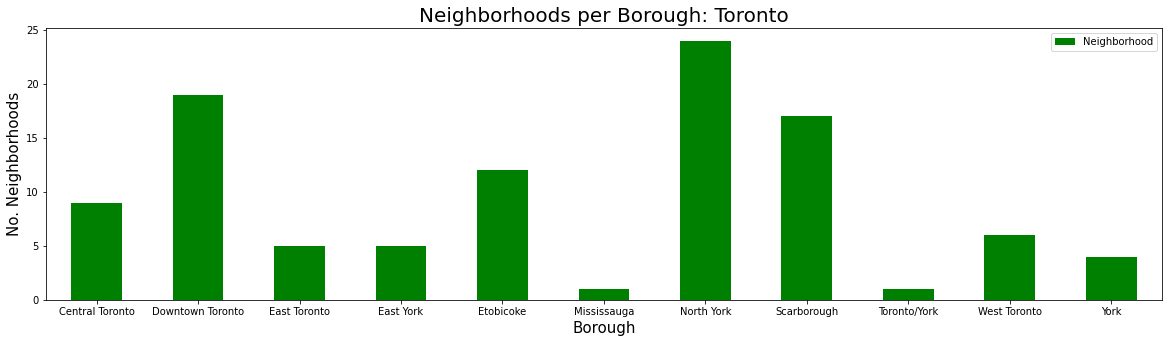

In [59]:
clr = "green"
toronto_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(20,5), color=clr)
plt.title('Neighborhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

### Let´s get the number of gyms for each neiborhoods and borough. Then, visualize the plots.

In [69]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
gym_toronto=pd.DataFrame(columns=column_names)
count=1
for row in toronto_data.values.tolist():
    Postcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    gyms=venues[venues['Category']=='Gym']   
    print('(',count,'/',len(toronto_data),')','Gym in '+Neighborhood+', '+Borough+':'+str(len(gyms)))
    print(row)
    for gym_detail in gyms.values.tolist():
        id, name , category=gym_detail
        gym_toronto = gym_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Gym in Malvern, Rouge, Scarborough:0
['M1B', 'Scarborough', 'Malvern, Rouge', 43.806686299999996, -79.19435340000001]
( 2 / 103 ) Gym in Rouge Hill, Port Union, Highland Creek, Scarborough:0
['M1C', 'Scarborough', 'Rouge Hill, Port Union, Highland Creek', 43.7845351, -79.16049709999999]
( 3 / 103 ) Gym in Guildwood, Morningside, West Hill, Scarborough:0
['M1E', 'Scarborough', 'Guildwood, Morningside, West Hill', 43.7635726, -79.1887115]
( 4 / 103 ) Gym in Woburn, Scarborough:0
['M1G', 'Scarborough', 'Woburn', 43.7709921, -79.21691740000001]
( 5 / 103 ) Gym in Cedarbrae, Scarborough:0
['M1H', 'Scarborough', 'Cedarbrae', 43.773136, -79.23947609999999]
( 6 / 103 ) Gym in Scarborough Village, Scarborough:0
['M1J', 'Scarborough', 'Scarborough Village', 43.7447342, -79.23947609999999]
( 7 / 103 ) Gym in Kennedy Park, Ionview, East Birchmount Park, Scarborough:0
['M1K', 'Scarborough', 'Kennedy Park, Ionview, East Birchmount Park', 43.7279292, -79.26202940000002]
( 8 / 103 ) Gym in

In [73]:
gym_toronto.shape

(21, 4)

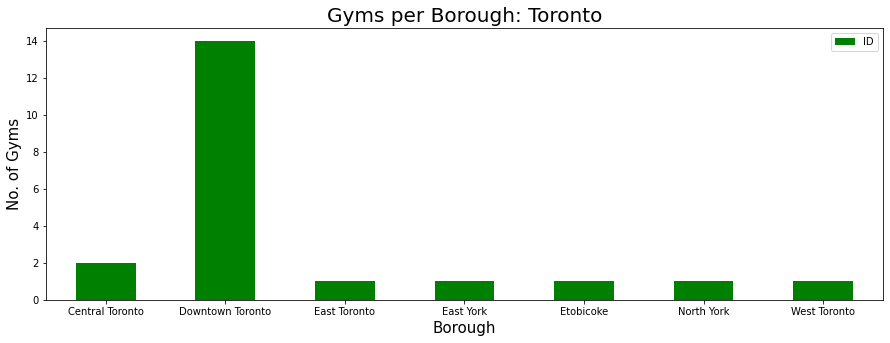

In [75]:
gym_toronto.groupby('Borough')['ID'].count().plot.bar(figsize=(15,5), color=clr)
plt.title('Gyms per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Gyms', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

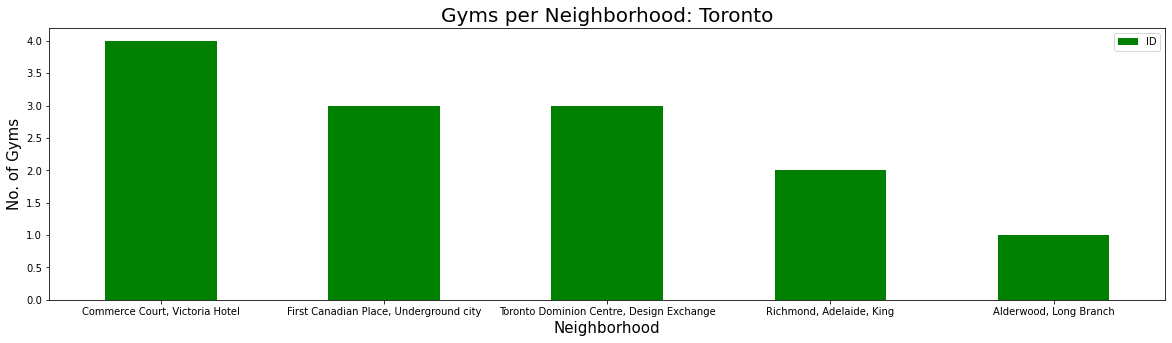

In [87]:
NOofNeigh = 5 # top number for graphing all the same past 6
gym_toronto.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,5), color=clr)
plt.title('Gyms per Neighborhood: Toronto', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Gyms', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [88]:
gym_toronto[gym_toronto['Neighborhood']=='Commerce Court, Victoria Hotel']

,Borough,Neighborhood,ID,Name
12,Downtown Toronto,"Commerce Court, Victoria Hotel",501ae947e4b0d11883b910a7,Equinox Bay Street
13,Downtown Toronto,"Commerce Court, Victoria Hotel",4c8166f4d34ca143fc272280,Toronto Athletic Club
14,Downtown Toronto,"Commerce Court, Victoria Hotel",4dc842f2e4cd5bc076711d90,GoodLife Fitness Toronto 137 Yonge Street
15,Downtown Toronto,"Commerce Court, Victoria Hotel",505b8b544c7fd4d07eae01f3,GoodLife Fitness Toronto Street Women's Only


We can observe that Commerce Court, Victoria Hotel located in Downtown Toronto has the highest gyms with a total number of 4.

Let's collect some additional data corresponding to gyms' ranking.

In [90]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
gyms_stats_toronto=pd.DataFrame(columns=column_names)
count=1
for row in gym_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(gym_toronto),')','processed')
    gyms_stats_toronto = gyms_stats_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
gyms_stats_toronto.tail()

{'meta': {'code': 200, 'requestId': '604eecec8b284d5459e0381b'}, 'response': {'venue': {'id': '4b71ff80f964a52035692de3', 'name': 'Fitness Connection', 'contact': {}, 'location': {'address': '900 Don Mills Road', 'lat': 43.72747286430573, 'lng': -79.34170684305083, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72747286430573, 'lng': -79.34170684305083}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['900 Don Mills Road', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/fitness-connection/4b71ff80f964a52035692de3', 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://www.fitnessconnection.ca', 'likes': {'count': 10, 'groups': [{'type': 'others', 'count': 10, 'items': []}], 'summary': '10 Likes'}, 'di

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
16,Downtown Toronto,"First Canadian Place, Underground city",501ae947e4b0d11883b910a7,Equinox Bay Street,54,8.4,13
17,Downtown Toronto,"First Canadian Place, Underground city",4c8166f4d34ca143fc272280,Toronto Athletic Club,8,7.5,5
18,Downtown Toronto,"First Canadian Place, Underground city",4b8702fdf964a52055ab31e3,The Cambridge Club,7,7.9,2
19,West Toronto,"Brockton, Parkdale Village, Exhibition Place",4f54ef6ce4b0929810978bb6,Reebok Crossfit Liberty Village,16,8.6,2
20,Etobicoke,"Alderwood, Long Branch",4b9fbdb4f964a520583a37e3,Toronto Gymnastics International,8,7.2,1


In [150]:
gyms_stats_toronto.shape

(21, 7)

We get some statistics for all 21 gyms in Toronto city

Let's visualize and transform our data to the right format for further analysis.

In [94]:
gyms_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       21 non-null     object 
 1   Neighborhood  21 non-null     object 
 2   ID            21 non-null     object 
 3   Name          21 non-null     object 
 4   Likes         21 non-null     object 
 5   Rating        21 non-null     float64
 6   Tips          21 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.3+ KB


In [95]:
gyms_stats_toronto['Likes'] = gyms_stats_toronto['Likes'].astype('float64')
gyms_stats_toronto['Tips'] = gyms_stats_toronto['Tips'].astype('float64')
gyms_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       21 non-null     object 
 1   Neighborhood  21 non-null     object 
 2   ID            21 non-null     object 
 3   Name          21 non-null     object 
 4   Likes         21 non-null     float64
 5   Rating        21 non-null     float64
 6   Tips          21 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.3+ KB


In [96]:
gyms_stats_toronto.describe()

,Likes,Rating,Tips
count,21.000000,21.000000,21.000000
mean,28.000000,7.338095,7.714286
std,36.666061,1.814518,8.608965
min,0.000000,0.000000,0.000000
25%,8.000000,7.200000,2.000000
50%,8.000000,7.500000,5.000000
75%,30.000000,8.400000,13.000000
max,126.000000,8.600000,30.000000


Gym with maximum likes

In [97]:
gyms_stats_toronto.iloc[gyms_stats_toronto['Likes'].idxmax()]

Borough                                  Downtown Toronto
Neighborhood                               St. James Town
ID                               4dc842f2e4cd5bc076711d90
Name            GoodLife Fitness Toronto 137 Yonge Street
Likes                                                 126
Rating                                                8.5
Tips                                                   30
Name: 5, dtype: object

Gym with maximum rating

In [98]:
gyms_stats_toronto.iloc[gyms_stats_toronto['Rating'].idxmax()]

Borough                                         West Toronto
Neighborhood    Brockton, Parkdale Village, Exhibition Place
ID                                  4f54ef6ce4b0929810978bb6
Name                         Reebok Crossfit Liberty Village
Likes                                                     16
Rating                                                   8.6
Tips                                                       2
Name: 19, dtype: object

Gym with maximum tips

In [99]:
gyms_stats_toronto.iloc[gyms_stats_toronto['Tips'].idxmax()]

Borough                                  Downtown Toronto
Neighborhood                               St. James Town
ID                               4dc842f2e4cd5bc076711d90
Name            GoodLife Fitness Toronto 137 Yonge Street
Likes                                                 126
Rating                                                8.5
Tips                                                   30
Name: 5, dtype: object

<h3> Maximum Average Rating of Gyms </h3>

In [114]:
toronto_neighborhood_rating=gIyms_stats_toronto.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
toronto_neighborhood_rating.columns=['Neighborhood','Average Rating']
toronto_neighborhood_rating.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
1,"Brockton, Parkdale Village, Exhibition Place",8.600000
10,St. James Town,8.500000
7,"India Bazaar, The Beaches West",8.200000
2,"Commerce Court, Victoria Hotel",8.025000
5,"First Canadian Place, Underground city",7.933333
12,"Toronto Dominion Centre, Design Exchange",7.566667
9,"Richmond, Adelaide, King",7.550000
11,Thorncliffe Park,7.500000
4,Don Mills,7.400000
0,"Alderwood, Long Branch",7.200000


In the previous table we can observe the ten neighborhoods with the highest average rating of gyms 

In [115]:
toronto_borough_rating=gyms_stats_toronto.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
toronto_borough_rating.columns=['Borough','Average Rating']
toronto_borough_rating.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
6,West Toronto,8.600000
2,East Toronto,8.200000
1,Downtown Toronto,7.714286
3,East York,7.500000
5,North York,7.400000


Here, we observe the top borough beased on the average rating of gyms

#### Plots

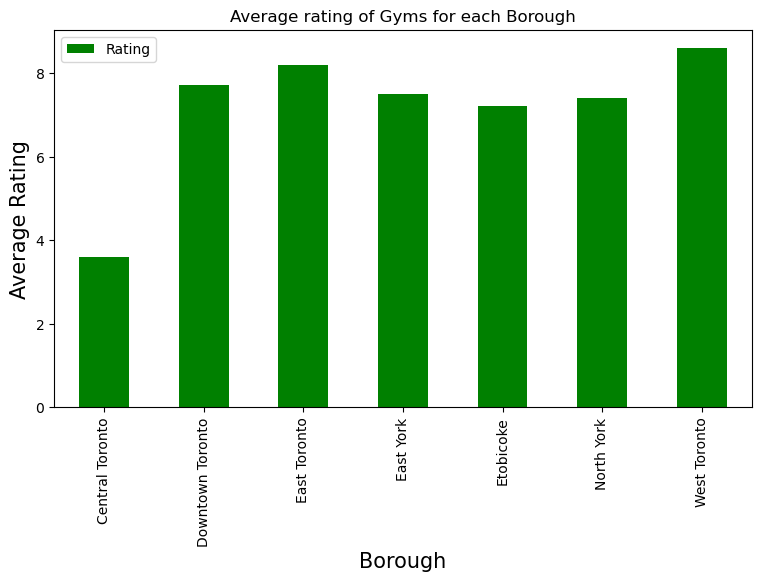

In [116]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Gyms for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
gyms_stats_toronto.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

Now, let's focus in all the neighborhoods whose ranking is greater than 7.

In [117]:
toronto_neighborhood_rating=toronto_neighborhood_rating[toronto_neighborhood_rating['Average Rating']>=7.0]
toronto_neighborhood_rating

,Neighborhood,Average Rating
0,"Alderwood, Long Branch",7.200000
1,"Brockton, Parkdale Village, Exhibition Place",8.600000
2,"Commerce Court, Victoria Hotel",8.025000
3,Davisville,7.200000
4,Don Mills,7.400000
5,"First Canadian Place, Underground city",7.933333
7,"India Bazaar, The Beaches West",8.200000
9,"Richmond, Adelaide, King",7.550000
10,St. James Town,8.500000
11,Thorncliffe Park,7.500000


Add the corresponding lattitude and longitude

In [118]:
toronto_neighborhood_rating=pd.merge(toronto_neighborhood_rating,toronto_data, on='Neighborhood')
toronto_neighborhood_rating=toronto_neighborhood_rating[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
toronto_neighborhood_rating

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,7.200000
1,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,8.600000
2,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,8.025000
3,Central Toronto,Davisville,43.704324,-79.388790,7.200000
4,North York,Don Mills,43.745906,-79.352188,7.400000
5,North York,Don Mills,43.725900,-79.340923,7.400000
6,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,7.933333
7,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,8.200000
8,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,7.550000
9,Downtown Toronto,St. James Town,43.651494,-79.375418,8.500000


In [124]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


#### Let's visualize the points in the Map

In [125]:
# create map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighborhood_rating['Latitude'], toronto_neighborhood_rating['Longitude'], toronto_neighborhood_rating['Borough'], toronto_neighborhood_rating['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

#### Add labels to each point in the map

In [127]:
toronto_neighborhood_rating['Label']=toronto_neighborhood_rating['Neighborhood']+', '+toronto_neighborhood_rating['Borough']+'('+toronto_neighborhood_rating['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in toronto_neighborhood_rating[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(toronto_map)        
# add ratings to map
toronto_map.add_child(rating)

## Conclusion

<div style="text-align: justify"> 
First of all, West Toronto and East Toronto are the boroughs with the highest gyms rating. Secondly, Downtown has the highest number of gyms with a total of fourteen where the neighbohood called Commerce Courte is on the top of the list with a total number of four. To be even more precise, the best fitness center in Downtown based on "likes" and "tips" is   "GoodLife Fitness Toronto 137 Younge street". However, the best ranking gym in the whole city is "Reebook Crossfit" located in West Toronto. Thirdly, based on the information collected from Foursquare that we have already discussed, we would state that West Toronto is the best option for opening a new fitness center, since even though Downtown also represent a tentative location for all the business around, we should take into account that real state prices are highest than in West Toronto. Additionally, the market in Downtown is highly competitive since there are too many gyms, while in West Toronto there is just one, so it might be easy to gain clients. Finally, we also reccomend to look for a place in the Brockton, Parkdale Village which is the neighborhood with the highest average rating of gyms in the West Toronto borough. 
</div>
